<a href="https://colab.research.google.com/github/Anudeepsadda/Hybrid_ML_Model_for_Efficient_Botnet_Attack_Detection_in_IoT_Environment/blob/main/Hybrid_Machine_Learning_Model_for_Efficient_Botnet_Attack_Detection_in_IoT_Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/7.gafgyt.combo.csv
/kaggle/input/9.gafgyt.combo.csv
/kaggle/input/5.gafgyt.combo.csv
/kaggle/input/1.mirai.udp.csv
/kaggle/input/4.gafgyt.udp.csv
/kaggle/input/6.gafgyt.udp.csv
/kaggle/input/6.gafgyt.junk.csv
/kaggle/input/data_summary.csv
/kaggle/input/5.gafgyt.udp.csv
/kaggle/input/9.gafgyt.junk.csv
/kaggle/input/9.mirai.scan.csv
/kaggle/input/1.benign.csv
/kaggle/input/2.mirai.udpplain.csv
/kaggle/input/3.gafgyt.combo.csv
/kaggle/input/4.gafgyt.combo.csv
/kaggle/input/6.mirai.scan.csv
/kaggle/input/5.mirai.udp.csv
/kaggle/input/3.benign.csv
/kaggle/input/3.gafgyt.junk.csv
/kaggle/input/7.gafgyt.scan.csv
/kaggle/input/features.csv
/kaggle/input/6.mirai.udp.csv
/kaggle/input/6.gafgyt.tcp.csv
/kaggle/input/6.gafgyt.combo.csv
/kaggle/input/README.md
/kaggle/input/6.mirai.syn.csv
/kaggle/input/7.gafgyt.udp.csv
/kaggle/input/5.gafgyt.junk.csv
/kaggle/input/8.gafgyt.combo.csv
/kaggle/input/7.gafgyt.junk.csv
/kaggle/input/5.mirai.ack.csv
/kaggle/input/4.mirai.syn.csv
/kaggle/i

In [ ]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE  # For class balancing

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
benign=pd.read_csv('../input/5.benign.csv')
g_c=pd.read_csv('../input/5.gafgyt.combo.csv')
g_j=pd.read_csv('../input/5.gafgyt.junk.csv')
g_s=pd.read_csv('../input/5.gafgyt.scan.csv')
g_t=pd.read_csv('../input/5.gafgyt.tcp.csv')
g_u=pd.read_csv('../input/5.gafgyt.udp.csv')
m_a=pd.read_csv('../input/5.mirai.ack.csv')
m_sc=pd.read_csv('../input/5.mirai.scan.csv')
m_sy=pd.read_csv('../input/5.mirai.syn.csv')
m_u=pd.read_csv('../input/5.mirai.udp.csv')
m_u_p=pd.read_csv('../input/5.mirai.udpplain.csv')

benign=benign.sample(frac=0.25,replace=False)
g_c=g_c.sample(frac=0.25,replace=False)
g_j=g_j.sample(frac=0.5,replace=False)
g_s=g_s.sample(frac=0.5,replace=False)
g_t=g_t.sample(frac=0.15,replace=False)
g_u=g_u.sample(frac=0.15,replace=False)
m_a=m_a.sample(frac=0.25,replace=False)
m_sc=m_sc.sample(frac=0.15,replace=False)
m_sy=m_sy.sample(frac=0.25,replace=False)
m_u=m_u.sample(frac=0.1,replace=False)
m_u_p=m_u_p.sample(frac=0.27,replace=False)

benign['type']='benign'
m_u['type']='mirai_udp'
g_c['type']='gafgyt_combo'
g_j['type']='gafgyt_junk'
g_s['type']='gafgyt_scan'
g_t['type']='gafgyt_tcp'
g_u['type']='gafgyt_udp'
m_a['type']='mirai_ack'
m_sc['type']='mirai_scan'
m_sy['type']='mirai_syn'
m_u_p['type']='mirai_udpplain'

data=pd.concat([benign,m_u,g_c,g_j,g_s,g_t,g_u,m_a,m_sc,m_sy,m_u_p],
               axis=0, sort=False, ignore_index=True)

In [ ]:
data.groupby('type')['type'].count()

type
benign            15538
gafgyt_combo      15345
gafgyt_junk       15449
gafgyt_scan       14648
gafgyt_tcp        15676
gafgyt_udp        15602
mirai_ack         15138
mirai_scan        14517
mirai_syn         16436
mirai_udp         15625
mirai_udpplain    15304
Name: type, dtype: int64

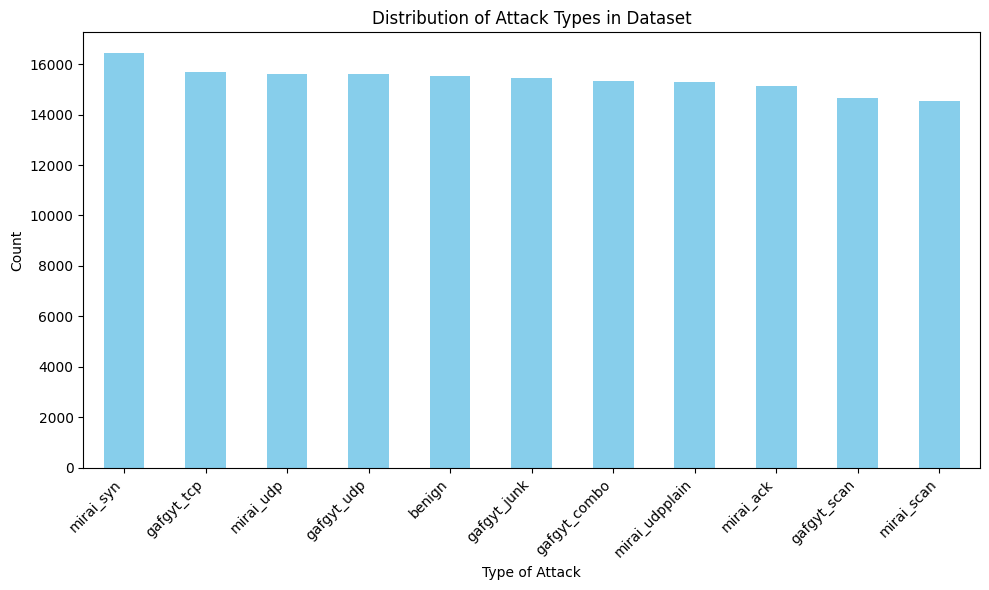

In [ ]:
import matplotlib.pyplot as plt

# Count the number of occurrences of each 'type'
type_counts = data['type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Attack Types in Dataset')
plt.xlabel('Type of Attack')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
sampler=np.random.permutation(len(data))
data=data.take(sampler)
data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,type
147609,62.950247,72.643405,1.717103e+01,107.945048,71.148279,3.187479e+01,335.453138,70.238474,38.723982,3483.956216,...,0.0,0.0,1.000000,74.0,0.000000e+00,74.0,0.000000e+00,0.0,0.0,mirai_syn
7703,1.031345,60.000000,4.550000e-13,1.125228,60.000000,4.550000e-13,1.500304,60.000000,0.000004,2.773463,...,0.0,0.0,4.318076,60.0,9.540000e-07,60.0,9.090000e-13,0.0,0.0,benign
155117,68.539086,228.140041,5.479010e+04,102.839386,271.141271,5.972299e+04,299.502255,306.495977,61002.604325,2654.348247,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0,mirai_udpplain
106546,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0,gafgyt_udp
82168,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0,gafgyt_tcp


In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['type'], axis=1)
y = data.loc[:, 'type']
X.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
147609,62.950247,72.643405,1.717103e+01,107.945048,71.148279,3.187479e+01,335.453138,70.238474,38.723982,3483.956216,...,0.000000e+00,0.0,0.0,1.000000,74.0,0.000000e+00,74.0,0.000000e+00,0.0,0.0
7703,1.031345,60.000000,4.550000e-13,1.125228,60.000000,4.550000e-13,1.500304,60.000000,0.000004,2.773463,...,9.090000e-13,0.0,0.0,4.318076,60.0,9.540000e-07,60.0,9.090000e-13,0.0,0.0
155117,68.539086,228.140041,5.479010e+04,102.839386,271.141271,5.972299e+04,299.502255,306.495977,61002.604325,2654.348247,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0
106546,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0
82168,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000e+00,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.0,0.0,1.000000,60.0,0.000000e+00,60.0,0.000000e+00,0.0,0.0


In [ ]:
y.head()

147609         mirai_syn
7703              benign
155117    mirai_udpplain
106546        gafgyt_udp
82168         gafgyt_tcp
Name: type, dtype: object

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
print("Data Shape:", data.shape)

def check_null(data):
    for i in data.isnull().sum():
        if data.isnull().sum()[i]!=0:
            return print("Data contains Null values.")
    return print("Data is Clean of Null values.")


def check_NA(data):
    for i in data.isna().sum():
        if data.isna().sum()[i]!=0:
            return print("Data contains Null.")
    return print("Data is Clean of NA.")

Data Shape: (169278, 116)


In [ ]:
print(data.duplicated().sum(), "fully duplicate rows to remove")
data.drop_duplicates(inplace=True)
data.reset_index(inplace=True, drop=True)
data.shape

991 fully duplicate rows to remove


(168287, 116)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)

# 1.Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0)
model1.fit(X_train_sc, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(model1.predict(X_train_sc), y_train)
acc2 = accuracy_score(model1.predict(X_test_sc), y_test)
print(acc1)
print(acc2)

0.8459205776173285
0.8471762759924386


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_train_pred_log = model1.predict(X_train_sc)
y_test_pred_log = model1.predict(X_test_sc)

# Classification Report
print("Classification Report - Logistic Regression (Train Data)")
print(classification_report(y_train, y_train_pred_log))

print("Classification Report - Logistic Regression (Test Data)")
print(classification_report(y_test, y_test_pred_log))

# Confusion Matrix
print("Confusion Matrix - Logistic Regression (Test Data)")
print(confusion_matrix(y_test, y_test_pred_log))


Classification Report - Logistic Regression (Train Data)
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     13979
  gafgyt_combo       0.76      0.59      0.67     13806
   gafgyt_junk       0.67      0.81      0.73     13922
   gafgyt_scan       1.00      1.00      1.00     13240
    gafgyt_tcp       0.50      1.00      0.67     14079
    gafgyt_udp       0.00      0.00      0.00     14038
     mirai_ack       0.98      0.95      0.97     13624
    mirai_scan       0.99      1.00      1.00     13096
     mirai_syn       1.00      0.99      0.99     14755
     mirai_udp       0.97      0.99      0.98     14050
mirai_udpplain       0.98      1.00      0.99     13761

      accuracy                           0.85    152350
     macro avg       0.80      0.85      0.82    152350
  weighted avg       0.80      0.85      0.81    152350

Classification Report - Logistic Regression (Test Data)
                precision    recall  f1-scor

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform training labels
y_test_encoded = label_encoder.transform(y_test)        # Transform test labels (same encoding)


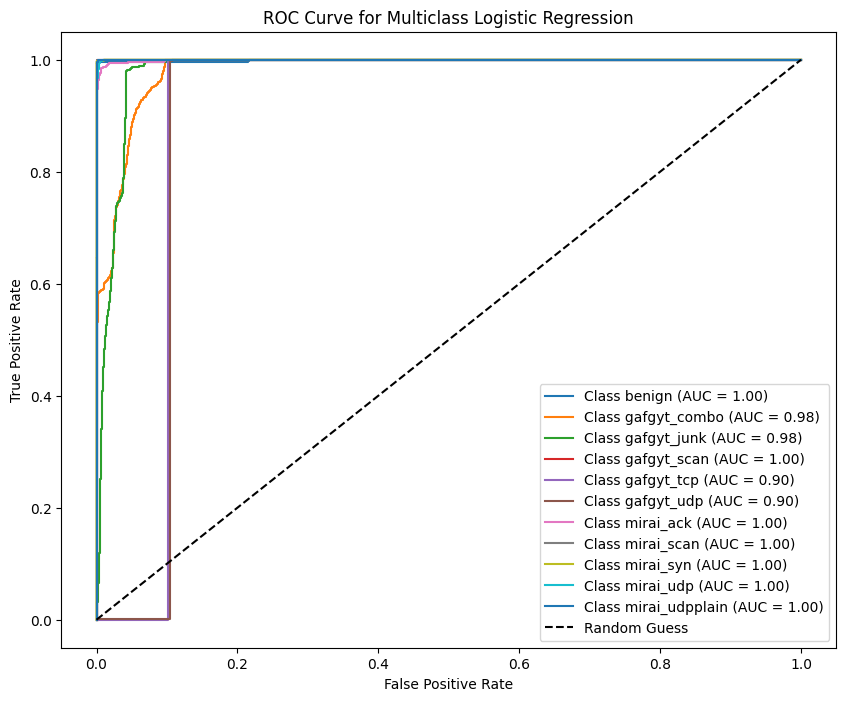

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Train Logistic Regression model
model1 = LogisticRegression(random_state=0, multi_class='multinomial', solver='lbfgs')
model1.fit(X_train_sc, y_train_encoded)

# Get predicted probabilities for each class
y_prob = model1.predict_proba(X_test_sc)

# Binarize the true labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Logistic Regression")
plt.legend(loc="lower right")
plt.show()


# 2.MLP CLASSIFIER

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=0)
mlp.fit(X_train_sc, y_train)


MLPClassifier(random_state=0)

In [ ]:
acc1 = accuracy_score(mlp.predict(X_train_sc), y_train)
acc2 = accuracy_score(mlp.predict(X_test_sc), y_test)
print(acc1)
print(acc2)

0.9053495241220872
0.9037098298676749


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions for MLP
y_train_pred_mlp = mlp.predict(X_train_sc)
y_test_pred_mlp = mlp.predict(X_test_sc)

# Classification Report for MLP
print("Classification Report - MLP (Train Data)")
print(classification_report(y_train, y_train_pred_mlp))

print("Classification Report - MLP (Test Data)")
print(classification_report(y_test, y_test_pred_mlp))

# Confusion Matrix for MLP
print("Confusion Matrix - MLP (Test Data)")
print(confusion_matrix(y_test, y_test_pred_mlp))


Classification Report - MLP (Train Data)
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14001
  gafgyt_combo       1.00      0.97      0.98     13846
   gafgyt_junk       0.97      1.00      0.98     13952
   gafgyt_scan       1.00      1.00      1.00     13179
    gafgyt_tcp       0.76      0.00      0.00     14019
    gafgyt_udp       0.50      1.00      0.67     14055
     mirai_ack       1.00      1.00      1.00     13602
    mirai_scan       1.00      1.00      1.00     13071
     mirai_syn       1.00      1.00      1.00     14777
     mirai_udp       1.00      1.00      1.00     14122
mirai_udpplain       1.00      1.00      1.00     13726

      accuracy                           0.91    152350
     macro avg       0.93      0.91      0.88    152350
  weighted avg       0.93      0.91      0.87    152350

Classification Report - MLP (Test Data)
                precision    recall  f1-score   support

        benign     

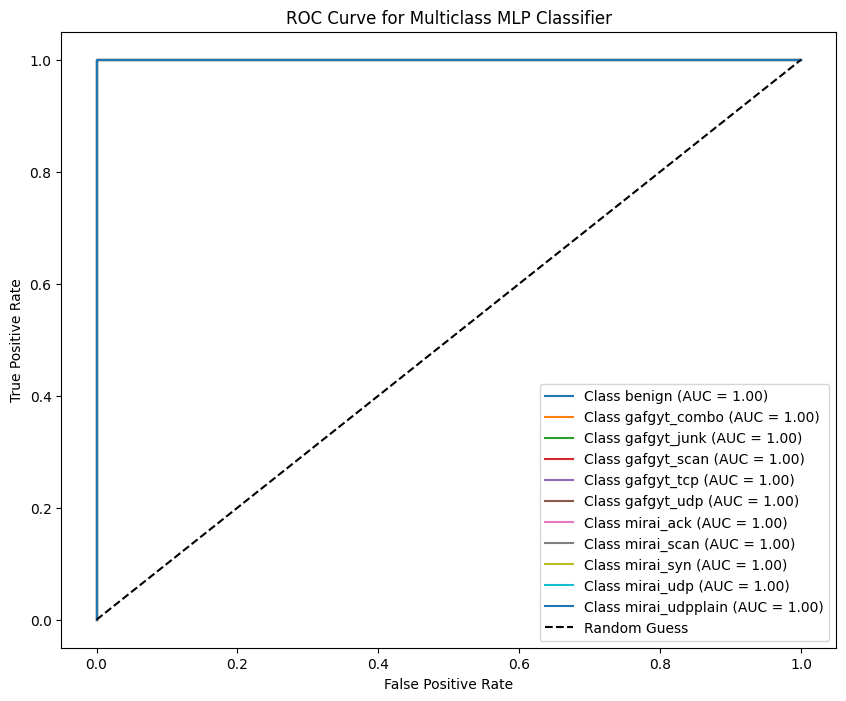

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for each class
y_prob_mlp = mlp.predict_proba(X_test_sc)

# Binarize the true labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_mlp[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass MLP Classifier")
plt.legend(loc="lower right")
plt.show()


# 3.RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # n_estimators can be tuned
rf_model.fit(X_train_sc, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_sc)
y_test_pred_rf = rf_model.predict(X_test_sc)

# Accuracy
acc_rf_train = accuracy_score(y_train, y_train_pred_rf)
acc_rf_test = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest - Training Accuracy:", acc_rf_train)
print("Random Forest - Testing Accuracy:", acc_rf_test)

# Classification Report
print("Classification Report - Random Forest (Train Data)")
print(classification_report(y_train, y_train_pred_rf))

print("Classification Report - Random Forest (Test Data)")
print(classification_report(y_test, y_test_pred_rf))

# Confusion Matrix
print("Confusion Matrix - Random Forest (Test Data)")
print(confusion_matrix(y_test, y_test_pred_rf))


Random Forest - Training Accuracy: 0.908086642599278
Random Forest - Testing Accuracy: 0.9020557655954632
Classification Report - Random Forest (Train Data)
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14001
  gafgyt_combo       1.00      1.00      1.00     13846
   gafgyt_junk       1.00      1.00      1.00     13952
   gafgyt_scan       1.00      1.00      1.00     13179
    gafgyt_tcp       1.00      0.00      0.00     14019
    gafgyt_udp       0.50      1.00      0.67     14055
     mirai_ack       1.00      1.00      1.00     13602
    mirai_scan       1.00      1.00      1.00     13071
     mirai_syn       1.00      1.00      1.00     14777
     mirai_udp       1.00      1.00      1.00     14122
mirai_udpplain       1.00      1.00      1.00     13726

      accuracy                           0.91    152350
     macro avg       0.95      0.91      0.88    152350
  weighted avg       0.95      0.91      0.88    152350



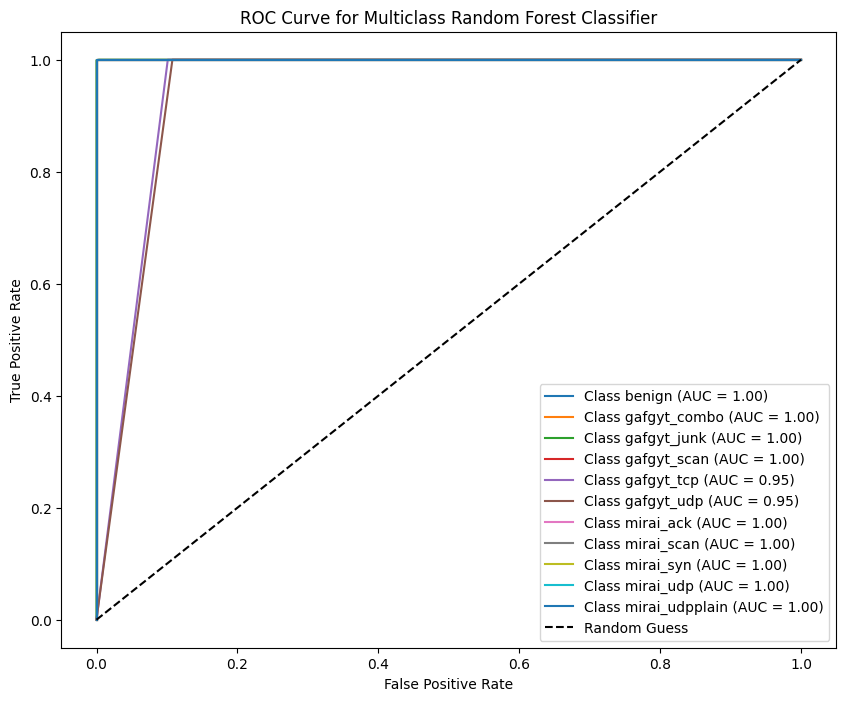

In [ ]:

y_prob_rf = rf_model.predict_proba(X_test_sc)

y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


# 4.XGBoost

In [ ]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# XGBoost Model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0)
xgb_model.fit(X_train_sc, y_train_encoded)

# Predictions
y_train_pred_xgb = xgb_model.predict(X_train_sc)
y_test_pred_xgb = xgb_model.predict(X_test_sc)

# Accuracy
acc_xgb_train = accuracy_score(y_train_encoded, y_train_pred_xgb)
acc_xgb_test = accuracy_score(y_test_encoded, y_test_pred_xgb)
print("XGBoost - Training Accuracy:", acc_xgb_train)
print("XGBoost - Testing Accuracy:", acc_xgb_test)

# Classification Report
print("Classification Report - XGBoost (Train Data)")
print(classification_report(y_train_encoded, y_train_pred_xgb, target_names=label_encoder.classes_))

print("Classification Report - XGBoost (Test Data)")
print(classification_report(y_test_encoded, y_test_pred_xgb, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix - XGBoost (Test Data)")
print(confusion_matrix(y_test_encoded, y_test_pred_xgb))


XGBoost - Training Accuracy: 0.9999934361667213
XGBoost - Testing Accuracy: 0.9998818525519849
Classification Report - XGBoost (Train Data)
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14001
  gafgyt_combo       1.00      1.00      1.00     13846
   gafgyt_junk       1.00      1.00      1.00     13952
   gafgyt_scan       1.00      1.00      1.00     13179
    gafgyt_tcp       1.00      1.00      1.00     14019
    gafgyt_udp       1.00      1.00      1.00     14055
     mirai_ack       1.00      1.00      1.00     13602
    mirai_scan       1.00      1.00      1.00     13071
     mirai_syn       1.00      1.00      1.00     14777
     mirai_udp       1.00      1.00      1.00     14122
mirai_udpplain       1.00      1.00      1.00     13726

      accuracy                           1.00    152350
     macro avg       1.00      1.00      1.00    152350
  weighted avg       1.00      1.00      1.00    152350

Classification Re

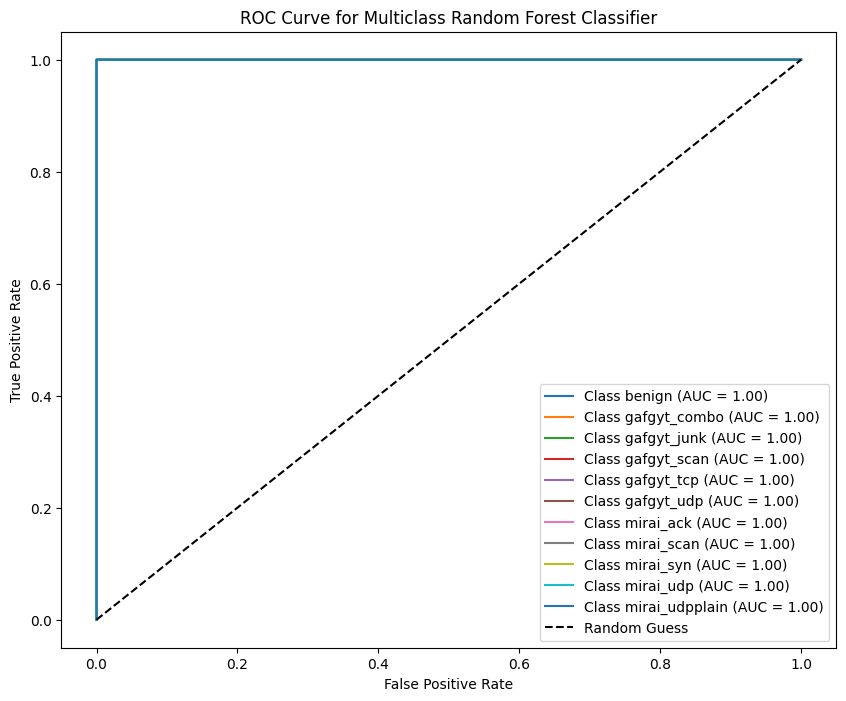

In [ ]:

# Get predicted probabilities for each class
y_prob_rf = xgb_model.predict_proba(X_test_sc)

# Binarize the true labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


# 5.KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance')  # Larger 'n_neighbors' with distance weighting
knn_model.fit(X_train_sc, y_train_encoded)

# Predictions
y_train_pred_knn = knn_model.predict(X_train_sc)
y_test_pred_knn = knn_model.predict(X_test_sc)

# Accuracy
acc_knn_train = accuracy_score(y_train_encoded, y_train_pred_knn)
acc_knn_test = accuracy_score(y_test_encoded, y_test_pred_knn)
print("KNN - Training Accuracy:", acc_knn_train)
print("KNN - Testing Accuracy:", acc_knn_test)


KNN - Training Accuracy: 1.0
KNN - Testing Accuracy: 0.9975189035916824


In [ ]:
# Classification Report
print("Classification Report - KNN (Train Data)")
print(classification_report(y_train_encoded, y_train_pred_knn, target_names=label_encoder.classes_))

print("Classification Report - KNN (Test Data)")
print(classification_report(y_test_encoded, y_test_pred_knn, target_names=label_encoder.classes_))


Classification Report - KNN (Train Data)
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14001
  gafgyt_combo       1.00      1.00      1.00     13846
   gafgyt_junk       1.00      1.00      1.00     13952
   gafgyt_scan       1.00      1.00      1.00     13179
    gafgyt_tcp       1.00      1.00      1.00     14019
    gafgyt_udp       1.00      1.00      1.00     14055
     mirai_ack       1.00      1.00      1.00     13602
    mirai_scan       1.00      1.00      1.00     13071
     mirai_syn       1.00      1.00      1.00     14777
     mirai_udp       1.00      1.00      1.00     14122
mirai_udpplain       1.00      1.00      1.00     13726

      accuracy                           1.00    152350
     macro avg       1.00      1.00      1.00    152350
  weighted avg       1.00      1.00      1.00    152350

Classification Report - KNN (Test Data)
                precision    recall  f1-score   support

        benign     

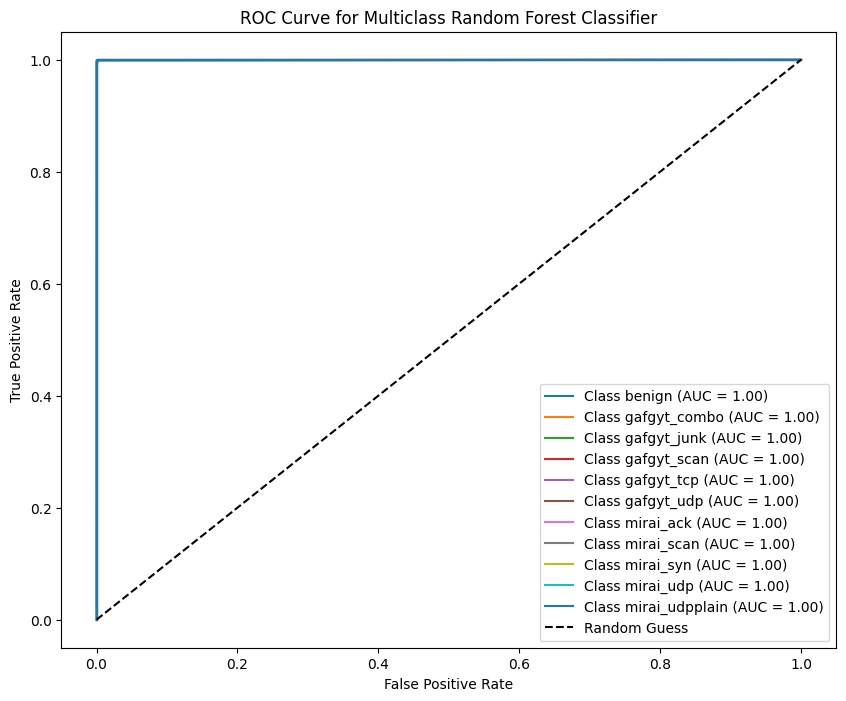

In [ ]:

# Get predicted probabilities for each class
y_prob_rf = knn_model.predict_proba(X_test_sc)

# Binarize the true labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


# 6.Light Gradient Boosting Classifier

In [ ]:
from lightgbm import LGBMClassifier

# LightGBM Classifier
lgb_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=0)
lgb_model.fit(X_train_sc, y_train_encoded)

# Predictions
y_train_pred_lgb = lgb_model.predict(X_train_sc)
y_test_pred_lgb = lgb_model.predict(X_test_sc)

# Accuracy
acc_lgb_train = accuracy_score(y_train_encoded, y_train_pred_lgb)
acc_lgb_test = accuracy_score(y_test_encoded, y_test_pred_lgb)
print("LightGBM - Training Accuracy:", acc_lgb_train)
print("LightGBM - Testing Accuracy:", acc_lgb_test)

# Classification Report
print("Classification Report - LightGBM (Train Data)")
print(classification_report(y_train_encoded, y_train_pred_lgb, target_names=label_encoder.classes_))

print("Classification Report - LightGBM (Test Data)")
print(classification_report(y_test_encoded, y_test_pred_lgb, target_names=label_encoder.classes_))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29296
[LightGBM] [Info] Number of data points in the train set: 152350, number of used features: 115
[LightGBM] [Info] Start training from score -2.387052
[LightGBM] [Info] Start training from score -2.398184
[LightGBM] [Info] Start training from score -2.390558
[LightGBM] [Info] Start training from score -2.447556
[LightGBM] [Info] Start training from score -2.385767
[LightGBM] [Info] Start training from score -2.383202
[LightGBM] [Info] Start training from score -2.415964
[LightGBM] [Info] Start training from score -2.455784
[LightGBM] [Info] Start training from score -2.333109
[LightGBM] [Info] Start training from score -2.378447
[LightGBM] [Info] Start training from score -2.406889
[LightGBM] [Warning] No further splits with positi

In [ ]:
print("LightGBM - Training Accuracy:", acc_lgb_train)
print("LightGBM - Testing Accuracy:", acc_lgb_test)

# Classification Report
print("Classification Report - LightGBM (Train Data)")
print(classification_report(y_train_encoded, y_train_pred_lgb, target_names=label_encoder.classes_))

print("Classification Report - LightGBM (Test Data)")
print(classification_report(y_test_encoded, y_test_pred_lgb, target_names=label_encoder.classes_))


LightGBM - Training Accuracy: 0.9999606170003282
LightGBM - Testing Accuracy: 0.9998818525519849
Classification Report - LightGBM (Train Data)
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14001
  gafgyt_combo       1.00      1.00      1.00     13846
   gafgyt_junk       1.00      1.00      1.00     13952
   gafgyt_scan       1.00      1.00      1.00     13179
    gafgyt_tcp       1.00      1.00      1.00     14019
    gafgyt_udp       1.00      1.00      1.00     14055
     mirai_ack       1.00      1.00      1.00     13602
    mirai_scan       1.00      1.00      1.00     13071
     mirai_syn       1.00      1.00      1.00     14777
     mirai_udp       1.00      1.00      1.00     14122
mirai_udpplain       1.00      1.00      1.00     13726

      accuracy                           1.00    152350
     macro avg       1.00      1.00      1.00    152350
  weighted avg       1.00      1.00      1.00    152350

Classification

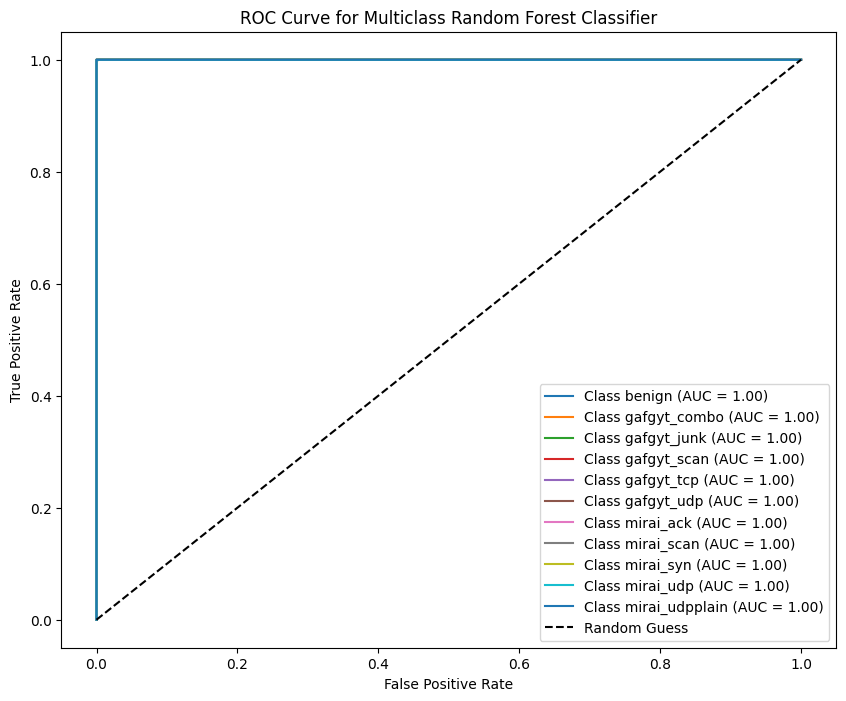

In [ ]:

# Get predicted probabilities for each class
y_prob_rf = lgb_model.predict_proba(X_test_sc)

# Binarize the true labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


## Cross validation for LGB to check overfitting

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lgb_model, X_train_sc, y_train_encoded, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: ", cv_scores)
print("Mean CV Accuracy: ", cv_scores.mean())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29295
[LightGBM] [Info] Number of data points in the train set: 121880, number of used features: 115
[LightGBM] [Info] Start training from score -2.387034
[LightGBM] [Info] Start training from score -2.398256
[LightGBM] [Info] Start training from score -2.390611
[LightGBM] [Info] Start training from score -2.447480
[LightGBM] [Info] Start training from score -2.385785
[LightGBM] [Info] Start training from score -2.383202
[LightGBM] [Info] Start training from score -2.415927
[LightGBM] [Info] Start training from score -2.455765
[LightGBM] [Info] Start training from score -2.333075
[LightGBM] [Info] Start training from score -2.378411
[LightGBM] [Info] Start training from score -2.406962
[LightGBM] [Warning] No further splits with positi

# 99% Ensembel model with Linear Regression,Random Forst and LGB

In [ ]:
from sklearn.ensemble import VotingClassifier

# Define the estimators for the ensemble
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),            # Random Forest model
    ('model1', model1),          # K-Nearest Neighbors model
    ('lgb', lgb_model)           # Light Gradient Boosting model
], voting='soft')  # Use 'hard' voting for majority voting, or 'soft' if models have `predict_proba`

# Fit the ensemble model
ensemble_model.fit(X_train_sc, y_train_encoded)

# Predictions for Ensemble Model
y_train_pred_ensemble = ensemble_model.predict(X_train_sc)
y_test_pred_ensemble = ensemble_model.predict(X_test_sc)

# Accuracy for Ensemble Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc_train_ensemble = accuracy_score(y_train_encoded, y_train_pred_ensemble)
acc_test_ensemble = accuracy_score(y_test_encoded, y_test_pred_ensemble)
print("Ensemble Model - Training Accuracy:", acc_train_ensemble)
print("Ensemble Model - Testing Accuracy:", acc_test_ensemble)

# Classification Report for Ensemble Model
print("Classification Report - Ensemble Model (Train Data)")
print(classification_report(y_train_encoded, y_train_pred_ensemble, target_names=label_encoder.classes_))

print("Classification Report - Ensemble Model (Test Data)")
print(classification_report(y_test_encoded, y_test_pred_ensemble, target_names=label_encoder.classes_))

# Confusion Matrix for Ensemble Model
print("Confusion Matrix - Ensemble Model (Test Data)")
print(confusion_matrix(y_test_encoded, y_test_pred_ensemble))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29296
[LightGBM] [Info] Number of data points in the train set: 152350, number of used features: 115
[LightGBM] [Info] Start training from score -2.387052
[LightGBM] [Info] Start training from score -2.398184
[LightGBM] [Info] Start training from score -2.390558
[LightGBM] [Info] Start training from score -2.447556
[LightGBM] [Info] Start training from score -2.385767
[LightGBM] [Info] Start training from score -2.383202
[LightGBM] [Info] Start training from score -2.415964
[LightGBM] [Info] Start training from score -2.455784
[LightGBM] [Info] Start training from score -2.333109
[LightGBM] [Info] Start training from score -2.378447
[LightGBM] [Info] Start training from score -2.406889
[LightGBM] [Warning] No further splits with positi

Ensemble Model - Training Accuracy: 0.9999606170003282
Ensemble Model - Testing Accuracy: 0.9998818525519849
Classification Report - Ensemble Model (Train Data)
                precision    recall  f1-score   support

        benign       1.00      1.00      1.00     14001
  gafgyt_combo       1.00      1.00      1.00     13846
   gafgyt_junk       1.00      1.00      1.00     13952
   gafgyt_scan       1.00      1.00      1.00     13179
    gafgyt_tcp       1.00      1.00      1.00     14019
    gafgyt_udp       1.00      1.00      1.00     14055
     mirai_ack       1.00      1.00      1.00     13602
    mirai_scan       1.00      1.00      1.00     13071
     mirai_syn       1.00      1.00      1.00     14777
     mirai_udp       1.00      1.00      1.00     14122
mirai_udpplain       1.00      1.00      1.00     13726

      accuracy                           1.00    152350
     macro avg       1.00      1.00      1.00    152350
  weighted avg       1.00      1.00      1.00    1523

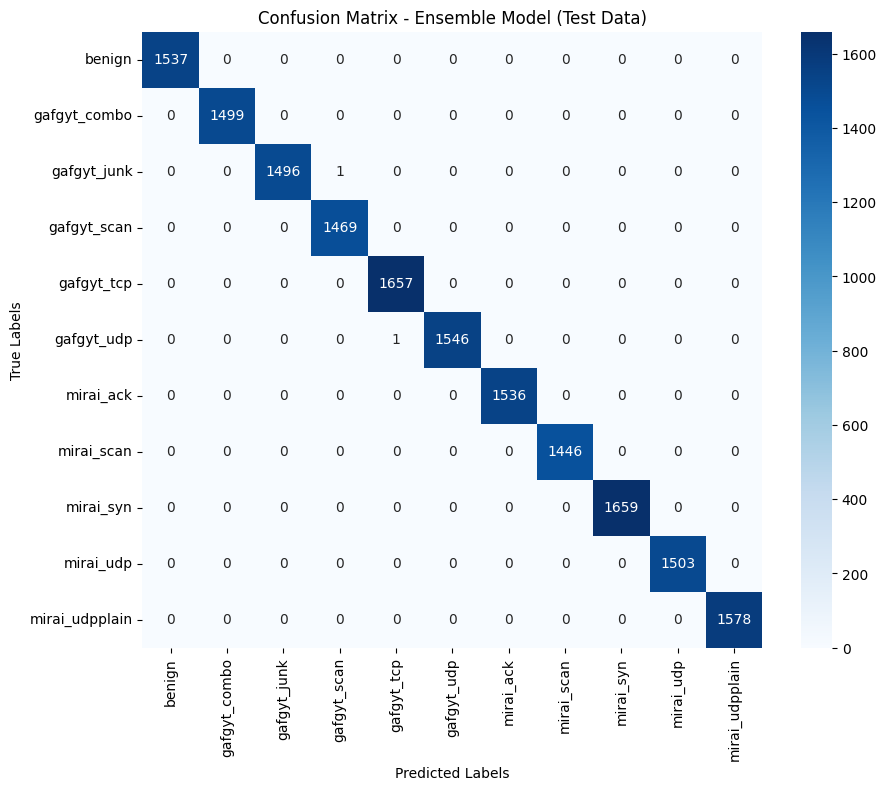

In [ ]:
# Accuracy for Ensemble Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc_train_ensemble = accuracy_score(y_train_encoded, y_train_pred_ensemble)
acc_test_ensemble = accuracy_score(y_test_encoded, y_test_pred_ensemble)
print("Ensemble Model - Training Accuracy:", acc_train_ensemble)
print("Ensemble Model - Testing Accuracy:", acc_test_ensemble)

# Classification Report for Ensemble Model
print("Classification Report - Ensemble Model (Train Data)")
print(classification_report(y_train_encoded, y_train_pred_ensemble, target_names=label_encoder.classes_))

print("Classification Report - Ensemble Model (Test Data)")
print(classification_report(y_test_encoded, y_test_pred_ensemble, target_names=label_encoder.classes_))

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for the ensemble model (Test Data)
cm_ensemble = confusion_matrix(y_test_encoded, y_test_pred_ensemble)

# Plot heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Ensemble Model (Test Data)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

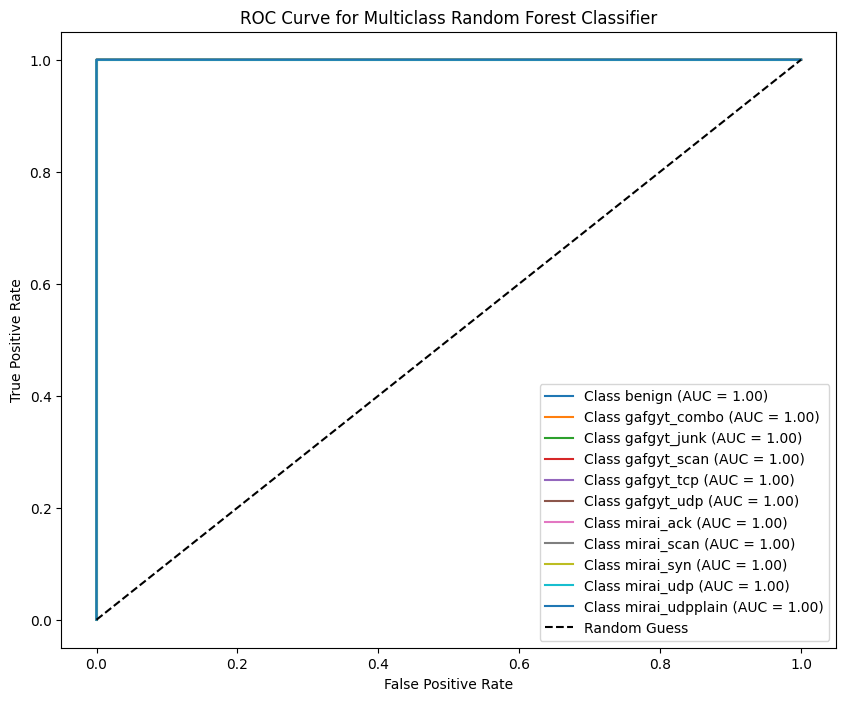

In [ ]:

# Get predicted probabilities for each class
y_prob_rf = ensemble_model.predict_proba(X_test_sc)

# Binarize the true labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guess
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

# Add labels, legend, and title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiclass Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib

# Save the ensemble model to a file
joblib.dump(ensemble_model, 'ensemble_model.pkl')

print("Ensemble model saved successfully.")


Ensemble model saved successfully.


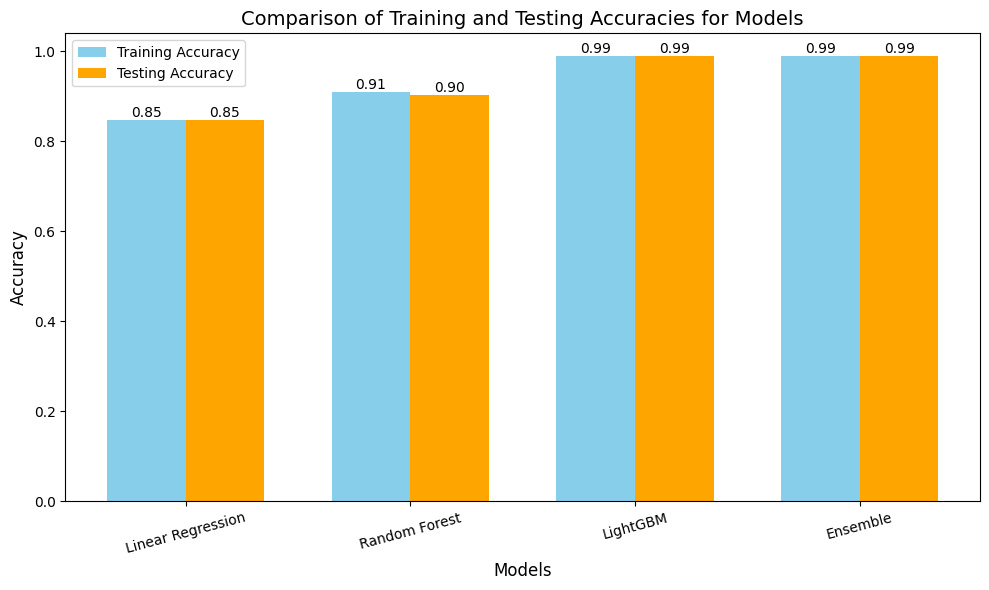

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Random Forest', 'LightGBM', 'Ensemble']

# Training and testing accuracies for each model
train_accuracies = [0.8462, 0.9081, 0.99, 0.99]
test_accuracies = [0.8472, 0.9021, 0.99, 0.99]

# Plotting
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='orange')

# Adding labels, title, and legend
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Comparison of Training and Testing Accuracies for Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=15, fontsize=10)
ax.legend(fontsize=10)

# Adding data labels
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

